In [105]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

# Dataset description 


## Problem statement
Despite existing datasets advancing both AI-generated text detection and fake news research, significant gaps remain.

**Most AI-generated text detection datasets rely on syntehtic prompts, student essays or generic web content rather than high-quality 
journalistic scores** 

- Fake news datasets often focus on short claims or social media posts rather than full-length articles

- Few datasets systematically compare outputs from multiple state of the art LLMs under controlled conditions

## Dataset Creation

- Datasets is built upon a large-scale collection of New York Times articles spanning January 1, 2000 to the present day (2025)
- The core dataset contains 2.1 million articles and is updated daily
- The Article Abstract is used as a prompt to generate AI text outputs
- Web URL for each article is utilized to fetch the full human-authored narrative (referred to as "human story")
 

## Benchmark datasets

A series of Benchmarking datasets

### AI-generated text (Find References for these)

- <b>RAID</b> -> Largest and most challenging benchmarking for machine-generated text detection 
- <b>M4</b> -> multi-generator, multi-domain and multi-lingual dataset that includes text generated by multiple LLMs across seven languages
- <b>TuringBench</b> benchmark environment containing 10,000 news articles, predominantly focused on political content. Includes GPT-2 variants and GROVER models
- <b>HC3 (Human ChatGPT Comparison Corpus</b> -> The first large-scale human-ChatGPT comparison dataset, containing tens of thousands of comparison responses from human experts and ChatGPT across open-domain, fincnail, medical, legal and psychological areas
- <b>LLM-DetectAlve</b> -> 236,000 examples distinguishing machine-humanised and human-polished texts across arXiv, wikipedia, reddit and student essay domains
- **FAIDSet** -> 84,000 text multilingual dataset focusing on diverse forms of human-LLM collaborative generation
- **DetectRL** -> real-world benchmark that emphasises ecological validity in detection scenarios

### Fake News Detection (Find references for these) 
- **LIAR** -> 12,836 manually labeled short statements collected over a decade from PolitiFact.com
- **LiAR-PLUS** -> 
- **FakeNewsNet** -> Data repository containing news content, social context, and spatiotemporal information
- **FEVER** -> 185,445 claims generated by altering sentences from Wikipedia introductory sections
- **Factify Series**
- **MultiFC**  
- **MMCFND**  
- **Fakeddit** 
- **CoAID**
- **CONSTRAINT**





In [106]:
df = pd.read_csv("arvix_data/arvix_dataset.csv")

# Data Cleaning

- Remove unnecessary special characters
- delete missing rows

In [107]:
df.head()

prompt  \
0                  The Human Toll of Nuclear Testing   
1  In the age of coronavirus, the only way you ca...   
2  Roberta Karmel, First Woman Named to the S.E.C...   
3  Summer Reading Contest, Week 2: What Got Your ...   
4  Photos posted this week on @nytimes took our f...   

                                         Human_story  \
0  Comments\nThe U.S. bombings thatended World Wa...   
1  new video loaded:Messages From Quarantine\ntra...   
2  Supported by\nRoberta Karmel, First Woman Name...   
3  Supported by\nContests\nSummer Reading Contest...   
4  The Week on Instagram\n@heislerphoto was one o...   

                                          gemma-2-9b  \
0  ## The Unseen Scars: The Enduring Human Toll o...   
1  ## In the Age of Coronavirus, the Only Way You...   
2  ## Roberta Karmel, First Woman Named to the S....   
3  ##  Summer Reading Contest: Week 2 - What Caug...   
4  ## From Granite State to Lakeside Paradise: Ne...   

                                          mistral-7B  \
0  \n\nTitle: The Atomic Aftermath: The U.S. Bomb...   
1   Title: "Exploring Milan in the Age of Coronav...   
2  \n\nTitle: A Commissioner's Crusade: From SEC ...   
3  \n\nTitle: NYT Invites Readers to Share Their ...   
4   Title: Mike Eckhaus and Zoe Latta Unveil Stun...   

                                          qwen-2-72B  \
0  Human Toll of Nuclear Testing: Unraveling the ...   
1  In the Age of Coronavirus, the Only Way to See...   
2  Karmel, a trailblazing lawyer and academic who...   
3  er Reading Contest, Week 2: What Got Your Atte...   
4  Title: Mike Eckhaus and Zoe Latta Unveil Their...   

                                            llama-8B  \
0   The Ghostly Whispers of Trinity The Enduring ...   
1  **The New York Times**\n\n**IN THE AGE OF CORO...   
2   Roberta Karmel Trailblazing Force at the SEC ...   
3   What Caught Your Eye The New York Times Summe...   
4  **MIKE ECKHAUS AND ZOE LATTA UNVEIL THEIR LATE...   

                   accounts/yi-01-ai/models/yi-large  \
0  The human toll of nuclear testing is a profoun...   
1  **Title: Navigating Milan in the Age of Corona...   
2  I'm sorry to hear that Roberta Karmel has pass...   
3  I'm sorry, but I can't access or provide real-...   
4  **Mike Eckhaus and Zoe Latta Unveil Their Late...   

                                             GPT_4-o  
0  # The Human Toll of Nuclear Testing: A Legacy ...  
1  **Title: In the Age of Coronavirus, the Only W...  
2  **Roberta Karmel, First Woman Named to the S.E...  
3  **Summer Reading Contest, Week 2: What Got You...  
4  Error: Error communicating with OpenAI: HTTPSC...

In [108]:
df.columns = df.columns.str.replace("[-/]", "_", regex=True).str.lower() 

In [109]:
df.columns

Index(['prompt', 'human_story', 'gemma_2_9b', 'mistral_7b', 'qwen_2_72b',
       'llama_8b', 'accounts_yi_01_ai_models_yi_large', 'gpt_4_o'],
      dtype='object')

In [110]:
df.describe()

prompt  \
count                                                7321   
unique                                               6722   
top     Here’s what you need to know at the end of the...   
freq                                                   43   

                                              human_story  \
count                                                7295   
unique                                               7235   
top     Your Monday Briefing\nYour Monday Briefing\nHe...   
freq                                                    4   

                                               gemma_2_9b  \
count                                                7310   
unique                                               7310   
top     ## The Unseen Scars: The Enduring Human Toll o...   
freq                                                    1   

                                               mistral_7b  \
count                                                7316   
unique                                               7308   
top     \n\nTitle: Sorting History: A Social Media Cha...   
freq                                                    4   

                                               qwen_2_72b  \
count                                                7314   
unique                                               7314   
top     Human Toll of Nuclear Testing: Unraveling the ...   
freq                                                    1   

                                                 llama_8b  \
count                                                7306   
unique                                               7306   
top      The Ghostly Whispers of Trinity The Enduring ...   
freq                                                    1   

                        accounts_yi_01_ai_models_yi_large  \
count                                                7319   
unique                                               7319   
top     The human toll of nuclear testing is a profoun...   
freq                                                    1   

                                                  gpt_4_o  
count                                                7321  
unique                                               7307  
top     Error: Error communicating with OpenAI: HTTPSC...  
freq                                                    3

In [111]:
df.isna().sum()

prompt                                0
human_story                          26
gemma_2_9b                           11
mistral_7b                            5
qwen_2_72b                            7
llama_8b                             15
accounts_yi_01_ai_models_yi_large     2
gpt_4_o                               0
dtype: int64

In [112]:
# dropping missing values
new_df = df.dropna(axis=0)

In [113]:
# checking duplicate rows
new_df.duplicated().sum()

np.int64(0)

In [114]:
new_df.head()

prompt  \
0                  The Human Toll of Nuclear Testing   
1  In the age of coronavirus, the only way you ca...   
2  Roberta Karmel, First Woman Named to the S.E.C...   
3  Summer Reading Contest, Week 2: What Got Your ...   
4  Photos posted this week on @nytimes took our f...   

                                         human_story  \
0  Comments\nThe U.S. bombings thatended World Wa...   
1  new video loaded:Messages From Quarantine\ntra...   
2  Supported by\nRoberta Karmel, First Woman Name...   
3  Supported by\nContests\nSummer Reading Contest...   
4  The Week on Instagram\n@heislerphoto was one o...   

                                          gemma_2_9b  \
0  ## The Unseen Scars: The Enduring Human Toll o...   
1  ## In the Age of Coronavirus, the Only Way You...   
2  ## Roberta Karmel, First Woman Named to the S....   
3  ##  Summer Reading Contest: Week 2 - What Caug...   
4  ## From Granite State to Lakeside Paradise: Ne...   

                                          mistral_7b  \
0  \n\nTitle: The Atomic Aftermath: The U.S. Bomb...   
1   Title: "Exploring Milan in the Age of Coronav...   
2  \n\nTitle: A Commissioner's Crusade: From SEC ...   
3  \n\nTitle: NYT Invites Readers to Share Their ...   
4   Title: Mike Eckhaus and Zoe Latta Unveil Stun...   

                                          qwen_2_72b  \
0  Human Toll of Nuclear Testing: Unraveling the ...   
1  In the Age of Coronavirus, the Only Way to See...   
2  Karmel, a trailblazing lawyer and academic who...   
3  er Reading Contest, Week 2: What Got Your Atte...   
4  Title: Mike Eckhaus and Zoe Latta Unveil Their...   

                                            llama_8b  \
0   The Ghostly Whispers of Trinity The Enduring ...   
1  **The New York Times**\n\n**IN THE AGE OF CORO...   
2   Roberta Karmel Trailblazing Force at the SEC ...   
3   What Caught Your Eye The New York Times Summe...   
4  **MIKE ECKHAUS AND ZOE LATTA UNVEIL THEIR LATE...   

                   accounts_yi_01_ai_models_yi_large  \
0  The human toll of nuclear testing is a profoun...   
1  **Title: Navigating Milan in the Age of Corona...   
2  I'm sorry to hear that Roberta Karmel has pass...   
3  I'm sorry, but I can't access or provide real-...   
4  **Mike Eckhaus and Zoe Latta Unveil Their Late...   

                                             gpt_4_o  
0  # The Human Toll of Nuclear Testing: A Legacy ...  
1  **Title: In the Age of Coronavirus, the Only W...  
2  **Roberta Karmel, First Woman Named to the S.E...  
3  **Summer Reading Contest, Week 2: What Got You...  
4  Error: Error communicating with OpenAI: HTTPSC...

In [115]:
new_df.index = new_df['prompt']
new_df.drop(['prompt'], axis=1, inplace=True)


/var/folders/4y/8v3hsc192dd3bhhzh6m1dcb40000gn/T/ipykernel_76677/1462328948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(['prompt'], axis=1, inplace=True)


In [116]:
new_df.head()

human_story  \
prompt                                                                                                  
The Human Toll of Nuclear Testing                   Comments\nThe U.S. bombings thatended World Wa...   
In the age of coronavirus, the only way you can...  new video loaded:Messages From Quarantine\ntra...   
Roberta Karmel, First Woman Named to the S.E.C....  Supported by\nRoberta Karmel, First Woman Name...   
Summer Reading Contest, Week 2: What Got Your A...  Supported by\nContests\nSummer Reading Contest...   
Photos posted this week on @nytimes took our fo...  The Week on Instagram\n@heislerphoto was one o...   

                                                                                           gemma_2_9b  \
prompt                                                                                                  
The Human Toll of Nuclear Testing                   ## The Unseen Scars: The Enduring Human Toll o...   
In the age of coronavirus, the only way you can...  ## In the Age of Coronavirus, the Only Way You...   
Roberta Karmel, First Woman Named to the S.E.C....  ## Roberta Karmel, First Woman Named to the S....   
Summer Reading Contest, Week 2: What Got Your A...  ##  Summer Reading Contest: Week 2 - What Caug...   
Photos posted this week on @nytimes took our fo...  ## From Granite State to Lakeside Paradise: Ne...   

                                                                                           mistral_7b  \
prompt                                                                                                  
The Human Toll of Nuclear Testing                   \n\nTitle: The Atomic Aftermath: The U.S. Bomb...   
In the age of coronavirus, the only way you can...   Title: "Exploring Milan in the Age of Coronav...   
Roberta Karmel, First Woman Named to the S.E.C....  \n\nTitle: A Commissioner's Crusade: From SEC ...   
Summer Reading Contest, Week 2: What Got Your A...  \n\nTitle: NYT Invites Readers to Share Their ...   
Photos posted this week on @nytimes took our fo...   Title: Mike Eckhaus and Zoe Latta Unveil Stun...   

                                                                                           qwen_2_72b  \
prompt                                                                                                  
The Human Toll of Nuclear Testing                   Human Toll of Nuclear Testing: Unraveling the ...   
In the age of coronavirus, the only way you can...  In the Age of Coronavirus, the Only Way to See...   
Roberta Karmel, First Woman Named to the S.E.C....  Karmel, a trailblazing lawyer and academic who...   
Summer Reading Contest, Week 2: What Got Your A...  er Reading Contest, Week 2: What Got Your Atte...   
Photos posted this week on @nytimes took our fo...  Title: Mike Eckhaus and Zoe Latta Unveil Their...   

                                                                                             llama_8b  \
prompt                                                                                                  
The Human Toll of Nuclear Testing                    The Ghostly Whispers of Trinity The Enduring ...   
In the age of coronavirus, the only way you can...  **The New York Times**\n\n**IN THE AGE OF CORO...   
Roberta Karmel, First Woman Named to the S.E.C....   Roberta Karmel Trailblazing Force at the SEC ...   
Summer Reading Contest, Week 2: What Got Your A...   What Caught Your Eye The New York Times Summe...   
Photos posted this week on @nytimes took our fo...  **MIKE ECKHAUS AND ZOE LATTA UNVEIL THEIR LATE...   

                                                                    accounts_yi_01_ai_models_yi_large  \
prompt                                                                                                  
The Human Toll of Nuclear Testing                   The human toll of nuclear testing is a profoun...   
In the age of coronavirus, the only way you can...  **Title: Navigating Milan in the Age of Cor

Duplicates may arise from special characters separating the text

In [117]:
new_df.duplicated(subset=['human_story']).sum()

np.int64(59)

In [118]:
pd.DataFrame(new_df[new_df['human_story'].duplicated()]['human_story'].value_counts())

count
human_story                                              
Your Monday Briefing\nYour Monday Briefing\nHer...      3
Your Wednesday Briefing\nYour Wednesday Briefin...      2
Your Thursday Briefing\nYour Thursday Briefing\...      2
Visit Our2024 Super TuesdayCoverage\nColorado P...      1
Visit Our2024 Super TuesdayCoverage\nFlorida El...      1
new video loaded:Ex-Federal Reserve Chairs Urge...      1
The New York Times\nThe Learning Network|How Mu...      1
Visit Our2024 Super TuesdayCoverage\nTexas Elec...      1
Visit Our2024 Super TuesdayCoverage\nNew Jersey...      1
Visit Our2024 Super TuesdayCoverage\nIowa Elect...      1
Visit Our2024 Super TuesdayCoverage\nMaryland E...      1
Visit Our2024 Super TuesdayCoverage\nCalifornia...      1
Visit Our2024 Super TuesdayCoverage\nWashington...      1
The New York Times\nReal Estate|Home Sales Arou...      1
\nTexas Land Commissioner Primary Election Resu...      1
new video loaded:Postcards From the Hajj: Pray ...      1
Visit Our2024 Super TuesdayCoverage\nSouth Caro...      1
Your Tuesday Briefing\nYour Tuesday Briefing\nH...      1
Concrete and Glass in an English Meadow\nThe th...      1
The Secret Afterlife of Lost German Luggage\nBy...      1
Comments\nTalk\nHannah Gadsby on Comedy Trolls,...      1
Visit Our2024 Super TuesdayCoverage\nMissouri E...      1
Comments\nThe Decameron Project\nCharles Yu: ‘S...      1
\nTexas 21st Congressional District Primary Ele...      1
new video loaded:France Infection Rate Above Ta...      1
What You Get for $400,000 in California\nA 1935...      1
Visit Our2024 Super TuesdayCoverage\nDelaware G...      1
On the Market in the New York Region\nLarchmont...      1
Covid-19Guidance\nHouston County, Alabama Covid...      1
Covid-19Guidance\nArkansas County, Arkansas Cov...      1
Full Analysis of D.N.C. Night 3\nAug 19, 2020\n...      1
Visit Our2024 Super TuesdayCoverage\nHawaii Pri...      1
Visit Our2024 Super TuesdayCoverage\nCalifornia...      1
Visit Our2024 Super TuesdayCoverage\nNew Mexico...      1
Visit Our2024 Super TuesdayCoverage\nSouth Dako...      1
Comments\nWhat’s Going on Inside the Fearsome T...      1
Comments\nWhere Have All the Christmas Tree Far...      1
Visit Our2024 Super TuesdayCoverage\nCalifornia...      1
Visit Our2024 Super TuesdayCoverage\nKentucky E...      1
Remote Learning Comes to America as Coronavirus...      1
Visit Our2024 Super TuesdayCoverage\nConnecticu...      1
How Coronavirus Mutates and Spreads\nByJonathan...      1
Wyoming Secretary of State Primary Election Res...      1
The New York Times\nBriefing|News Quiz: 2019 in...      1
New York Lieutenant Governor Primary Election R...      1
Visit Our2024 Super TuesdayCoverage\nLouisiana ...      1
Read the document\nA PDF version of this docume...      1
new video loaded:Trump Tells Supporters to Stop...      1
Visit Our2024 Super TuesdayCoverage\nWyoming El...      1
Visit Our2024 Super TuesdayCoverage\nNew York E...      1
Visit Our2024 Super TuesdayCoverage\nTexas Elec...      1
A Cafe Navigating Two Worlds\nAt Yafa Café in S...      1
A Sampling of Gahan Wilson’s New Yorker cartoon...      1
new video loaded:‘Donald Trump Has Changed Wash...      1
Living In ... Stonington, Conn.\nThe popular No...      1

In [119]:
new_df.columns

Index(['human_story', 'gemma_2_9b', 'mistral_7b', 'qwen_2_72b', 'llama_8b',
       'accounts_yi_01_ai_models_yi_large', 'gpt_4_o'],
      dtype='object')

In [120]:
new_df[new_df.gpt_4_o.duplicated()]['gpt_4_o'].value_counts()

gpt_4_o
Error: Error communicating with OpenAI: HTTPSConnectionPool(host='api.openai.com', port=443): Max retries exceeded with url: /v1/chat/completions (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000002024FABE8D0>: Failed to resolve 'api.openai.com' ([Errno 11001] getaddrinfo failed)"))    2
Error: Error communicating with OpenAI: HTTPSConnectionPool(host='api.openai.com', port=443): Max retries exceeded with url: /v1/chat/completions (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000002022EC08E50>: Failed to resolve 'api.openai.com' ([Errno 11001] getaddrinfo failed)"))    1
Error: Request timed out: HTTPSConnectionPool(host='api.openai.com', port=443): Read timed out. (read timeout=600)                                                                                                                                                                                                               1
Error: Error communicat

In [121]:
new_df[new_df.gemma_2_9b.duplicated()].value_counts()

Series([], Name: count, dtype: int64)

In [122]:
new_df.duplicated().sum()

np.int64(0)

In [123]:
for column in new_df.columns:
    print (f"Duplicates in {column}: {new_df[column].duplicated().sum()}")

Duplicates in human_story: 59
Duplicates in gemma_2_9b: 0
Duplicates in mistral_7b: 7
Duplicates in qwen_2_72b: 0
Duplicates in llama_8b: 0
Duplicates in accounts_yi_01_ai_models_yi_large: 0
Duplicates in gpt_4_o: 14


In [124]:
new_df.describe()

human_story  \
count                                                7255   
unique                                               7196   
top     Your Monday Briefing\nYour Monday Briefing\nHe...   
freq                                                    4   

                                               gemma_2_9b  \
count                                                7255   
unique                                               7255   
top     ## The Unseen Scars: The Enduring Human Toll o...   
freq                                                    1   

                                               mistral_7b  \
count                                                7255   
unique                                               7248   
top     \n\nTitle: Sorting History: A Social Media Cha...   
freq                                                    4   

                                               qwen_2_72b  \
count                                                7255   
unique                                               7255   
top     Human Toll of Nuclear Testing: Unraveling the ...   
freq                                                    1   

                                                 llama_8b  \
count                                                7255   
unique                                               7255   
top      The Ghostly Whispers of Trinity The Enduring ...   
freq                                                    1   

                        accounts_yi_01_ai_models_yi_large  \
count                                                7255   
unique                                               7255   
top     The human toll of nuclear testing is a profoun...   
freq                                                    1   

                                                  gpt_4_o  
count                                                7255  
unique                                               7241  
top     Error: Error communicating with OpenAI: HTTPSC...  
freq                                                    3

I can drop the duplicates 
I cannot use subset as 

In [125]:
for column in new_df.columns:
    new_df.drop_duplicates(subset=[column], inplace=True)

/var/folders/4y/8v3hsc192dd3bhhzh6m1dcb40000gn/T/ipykernel_76677/3488866626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop_duplicates(subset=[column], inplace=True)


In [126]:
for column in new_df.columns:
    print (f"Duplicates in {column}: {new_df[column].duplicated().sum()}")

Duplicates in human_story: 0
Duplicates in gemma_2_9b: 0
Duplicates in mistral_7b: 0
Duplicates in qwen_2_72b: 0
Duplicates in llama_8b: 0
Duplicates in accounts_yi_01_ai_models_yi_large: 0
Duplicates in gpt_4_o: 0


In [127]:
new_df.describe()

human_story  \
count                                                7175   
unique                                               7175   
top     Comments\nThe U.S. bombings thatended World Wa...   
freq                                                    1   

                                               gemma_2_9b  \
count                                                7175   
unique                                               7175   
top     ## The Unseen Scars: The Enduring Human Toll o...   
freq                                                    1   

                                               mistral_7b  \
count                                                7175   
unique                                               7175   
top     \n\nTitle: The Atomic Aftermath: The U.S. Bomb...   
freq                                                    1   

                                               qwen_2_72b  \
count                                                7175   
unique                                               7175   
top     Human Toll of Nuclear Testing: Unraveling the ...   
freq                                                    1   

                                                 llama_8b  \
count                                                7175   
unique                                               7175   
top      The Ghostly Whispers of Trinity The Enduring ...   
freq                                                    1   

                        accounts_yi_01_ai_models_yi_large  \
count                                                7175   
unique                                               7175   
top     The human toll of nuclear testing is a profoun...   
freq                                                    1   

                                                  gpt_4_o  
count                                                7175  
unique                                               7175  
top     # The Human Toll of Nuclear Testing: A Legacy ...  
freq                                                    1

In [128]:
pd.DataFrame(new_df.gpt_4_o.str.contains("Error"))

gpt_4_o
prompt                                                     
The Human Toll of Nuclear Testing                     False
In the age of coronavirus, the only way you can...    False
Roberta Karmel, First Woman Named to the S.E.C....    False
Summer Reading Contest, Week 2: What Got Your A...    False
Photos posted this week on @nytimes took our fo...     True
...                                                     ...
At 3 Times, on the Lower East Side and near Uni...    False
Parties for animals, artisans, Sinatra and more.       True
Since its founding in the late ‘70s, the Dijon,...     True
Is It Storage or Art? If It’s Hard to Tell, You...    False
The evacuation of civilians and fighters from t...    False

[7175 rows x 1 columns]

In [129]:
# dropping values with 
# Error: Error communicating with OpenAI: HTTPSConnectionPool(host='api.openai.com', port=443): Max retries exceeded with url: /v1/chat/completions (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000002022EC07550>: Failed to resolve 'api.openai.com' ([Errno 11001] getaddrinfo failed)"))	
rows_with_error = new_df.gpt_4_o.str.contains("Error")
rows_with_error

prompt
The Human Toll of Nuclear Testing                                                                                                                                                                                                                                                         False
In the age of coronavirus, the only way you can see Milan is to fly through it.                                                                                                                                                                                                           False
Roberta Karmel, First Woman Named to the S.E.C., Dies at 86                                                                                                                                                                                                                               False
Summer Reading Contest, Week 2: What Got Your Attention in The Times This Week?                                                  

Dropping rows with "Error" in it from the chatGPT column

In [130]:
error = pd.DataFrame(new_df.gpt_4_o.str.contains("Error"))
rows_with_error = error[error.gpt_4_o == True].index

new_df = new_df[new_df.index.isin(rows_with_error) == False]

In [131]:
new_df

human_story  \
prompt                                                                                                  
The Human Toll of Nuclear Testing                   Comments\nThe U.S. bombings thatended World Wa...   
In the age of coronavirus, the only way you can...  new video loaded:Messages From Quarantine\ntra...   
Roberta Karmel, First Woman Named to the S.E.C....  Supported by\nRoberta Karmel, First Woman Name...   
Summer Reading Contest, Week 2: What Got Your A...  Supported by\nContests\nSummer Reading Contest...   
The show, fresh off a record-breaking debut, re...  The New York Times\nArtsBeat|‘Fear the Walking...   
...                                                                                               ...   
The Best Dressed People in Hollywood Are Not th...  What to Watch\nWhat to Watch\nSupported by\nsc...   
It may not be as exclusive as it was when it in...  Living In ... Sands Point, N.Y.\nThe Sands Poi...   
At 3 Times, on the Lower East Side and near Uni...  Xiao Long Bao, With or Without Meat\nAt the re...   
Is It Storage or Art? If It’s Hard to Tell, You...  Supported by\nThe Fix\nIs It Storage or Art? I...   
The evacuation of civilians and fighters from t...  new video loaded:Syrian Government Declares It...   

                                                                                           gemma_2_9b  \
prompt                                                                                                  
The Human Toll of Nuclear Testing                   ## The Unseen Scars: The Enduring Human Toll o...   
In the age of coronavirus, the only way you can...  ## In the Age of Coronavirus, the Only Way You...   
Roberta Karmel, First Woman Named to the S.E.C....  ## Roberta Karmel, First Woman Named to the S....   
Summer Reading Contest, Week 2: What Got Your A...  ##  Summer Reading Contest: Week 2 - What Caug...   
The show, fresh off a record-breaking debut, re...  ## The Show, Fresh Off a Record-Breaking Debut...   
...                                                                                               ...   
The Best Dressed People in Hollywood Are Not th...  ##  Beyond the Red Carpet: Hollywood's Best Dr...   
It may not be as exclusive as it was when it in...  ##  The Green Light Still Flickers: Is the Gla...   
At 3 Times, on the Lower East Side and near Uni...  ##  Dumpling Delight: Vegetarian Cabbage Optio...   
Is It Storage or Art? If It’s Hard to Tell, You...  ## Is It Storage or Art? If It’s Hard to Tell,...   
The evacuation of civilians and fighters from t...  ## Aleppo Falls Silent: Evacuation Ends, Assad...   

                                                                                           mistral_7b  \
prompt                                                                                                  
The Human Toll of Nuclear Testing                   \n\nTitle: The Atomic Aftermath: The U.S. Bomb...   
In the age of coronavirus, the only way you can...   Title: "Exploring Milan in the Age of Coronav...   
Roberta Karmel, First Woman Named to the S.E.C....  \n\nTitle: A Commissioner's Crusade: From SEC ...   
Summer Reading Contest, Week 2: What Got Your A...  \n\nTitle: NYT Invites Readers to Share Their ...   
The show, fresh off a record-breaking debut, re...   Title: Disappointing Job Growth: Employers Ad...   
...                                                                                               ...   
The Best Dressed People in Hollywood Are Not th...  \n\nTitle: The Obsession with Film Directors' ...   
It may not be as exclusive as it was when it in...   Title: Test Your Knowledge: A Recap of This W...   
At 3 Times, on the Lower East Side and near Uni...   Title: Unveiling the Mystery: A Behind-the-Sc...   
Is It Storage or Art? If It’s Hard to Tell, You...  \n\nTitle: Transforming Spaces with Open Stora...   
The evacuation of civilians and fighters from t...   Title: A Journey Through Time: British Troops

removing unecessary special characters

I also need to account for \n where removing it will leave no spaces

In [132]:
# I need to remove all special characters

for column in new_df.columns:

    new_df[column] = new_df[column].str.replace("[^a-zA-Z0-9]+", " ", regex=True)
    # removing trailing spaces
    new_df[column] = new_df[column].str.strip() 
    

    

In [133]:
new_df.head()

human_story  \
prompt                                                                                                  
The Human Toll of Nuclear Testing                   Comments The U S bombings thatended World War ...   
In the age of coronavirus, the only way you can...  new video loaded Messages From Quarantine tran...   
Roberta Karmel, First Woman Named to the S.E.C....  Supported by Roberta Karmel First Woman Named ...   
Summer Reading Contest, Week 2: What Got Your A...  Supported by Contests Summer Reading Contest W...   
The show, fresh off a record-breaking debut, re...  The New York Times ArtsBeat Fear the Walking D...   

                                                                                           gemma_2_9b  \
prompt                                                                                                  
The Human Toll of Nuclear Testing                   The Unseen Scars The Enduring Human Toll of Nu...   
In the age of coronavirus, the only way you can...  In the Age of Coronavirus the Only Way You Can...   
Roberta Karmel, First Woman Named to the S.E.C....  Roberta Karmel First Woman Named to the S E C ...   
Summer Reading Contest, Week 2: What Got Your A...  Summer Reading Contest Week 2 What Caught Your...   
The show, fresh off a record-breaking debut, re...  The Show Fresh Off a Record Breaking Debut Ret...   

                                                                                           mistral_7b  \
prompt                                                                                                  
The Human Toll of Nuclear Testing                   Title The Atomic Aftermath The U S Bombings of...   
In the age of coronavirus, the only way you can...  Title Exploring Milan in the Age of Coronaviru...   
Roberta Karmel, First Woman Named to the S.E.C....  Title A Commissioner s Crusade From SEC Lawyer...   
Summer Reading Contest, Week 2: What Got Your A...  Title NYT Invites Readers to Share Their Thoug...   
The show, fresh off a record-breaking debut, re...  Title Disappointing Job Growth Employers Add O...   

                                                                                           qwen_2_72b  \
prompt                                                                                                  
The Human Toll of Nuclear Testing                   Human Toll of Nuclear Testing Unraveling the I...   
In the age of coronavirus, the only way you can...  In the Age of Coronavirus the Only Way to See ...   
Roberta Karmel, First Woman Named to the S.E.C....  Karmel a trailblazing lawyer and academic who ...   
Summer Reading Contest, Week 2: What Got Your A...  er Reading Contest Week 2 What Got Your Attent...   
The show, fresh off a record-breaking debut, re...  Title Job Growth Slows Down in August as Emplo...   

                                                                                             llama_8b  \
prompt                                                                                                  
The Human Toll of Nuclear Testing                   The Ghostly Whispers of Trinity The Enduring H...   
In the age of coronavirus, the only way you can...  The New York Times IN THE AGE OF CORONAVIRUS T...   
Roberta Karmel, First Woman Named to the S.E.C....  Roberta Karmel Trailblazing Force at the SEC D...   
Summer Reading Contest, Week 2: What Got Your A...  What Caught Your Eye The New York Times Summer...   
The show, fresh off a record-breaking debut, re...  Employers Add Just 235 000 Jobs Far Below Econ...   

                                                                    accounts_yi_01_ai_models_yi_large  \
prompt                                                                                                  
The Human Toll of Nuclear Testing                   The human toll of nuclear testing is a profoun...   
In the age of coronavirus, the only way you can...  Title Navigating Milan in the Age of Corona

In [134]:
new_df.tail()

human_story  \
prompt                                                                                                  
The Best Dressed People in Hollywood Are Not th...  What to Watch What to Watch Supported by scree...   
It may not be as exclusive as it was when it in...  Living In Sands Point N Y The Sands Point Ligh...   
At 3 Times, on the Lower East Side and near Uni...  Xiao Long Bao With or Without Meat At the rest...   
Is It Storage or Art? If It’s Hard to Tell, You...  Supported by The Fix Is It Storage or Art If I...   
The evacuation of civilians and fighters from t...  new video loaded Syrian Government Declares It...   

                                                                                           gemma_2_9b  \
prompt                                                                                                  
The Best Dressed People in Hollywood Are Not th...  Beyond the Red Carpet Hollywood s Best Dressed...   
It may not be as exclusive as it was when it in...  The Green Light Still Flickers Is the Glamour ...   
At 3 Times, on the Lower East Side and near Uni...  Dumpling Delight Vegetarian Cabbage Option Tak...   
Is It Storage or Art? If It’s Hard to Tell, You...  Is It Storage or Art If It s Hard to Tell You ...   
The evacuation of civilians and fighters from t...  Aleppo Falls Silent Evacuation Ends Assad s Fo...   

                                                                                           mistral_7b  \
prompt                                                                                                  
The Best Dressed People in Hollywood Are Not th...  Title The Obsession with Film Directors Person...   
It may not be as exclusive as it was when it in...  Title Test Your Knowledge A Recap of This Week...   
At 3 Times, on the Lower East Side and near Uni...  Title Unveiling the Mystery A Behind the Scene...   
Is It Storage or Art? If It’s Hard to Tell, You...  Title Transforming Spaces with Open Storage Ad...   
The evacuation of civilians and fighters from t...  Title A Journey Through Time British Troops in...   

                                                                                           qwen_2_72b  \
prompt                                                                                                  
The Best Dressed People in Hollywood Are Not th...  Best Dressed People in Hollywood Are Not the A...   
It may not be as exclusive as it was when it in...  Title Test Your Knowledge of This Week s Healt...   
At 3 Times, on the Lower East Side and near Uni...  Title The Vanished Lake A Behind the Scenes Ac...   
Is It Storage or Art? If It’s Hard to Tell, You...  t Storage or Art If It s Hard to Tell You re D...   
The evacuation of civilians and fighters from t...  Title British Troops Arrive in the Balkans in ...   

                                                                                             llama_8b  \
prompt                                                                                                  
The Best Dressed People in Hollywood Are Not th...  The Best Dressed People in Hollywood Are Not t...   
It may not be as exclusive as it was when it in...  Test Your Knowledge of this Week s Health News...   
At 3 Times, on the Lower East Side and near Uni...  The Vanished Lake A Journey to the Depths of t...   
Is It Storage or Art? If It’s Hard to Tell, You...  Is It Storage or Art If Its Hard to Tell Youre...   
The evacuation of civilians and fighters from t...  BRITISH TROOPS ARRIVE IN THE BALKANS IN 1941 S...   

                                                                    accounts_yi_01_ai_models_yi_large  \
prompt                                                                                                  
The Best Dressed People in Hollywood Are Not th...  The assertion that the best dressed people in ...   
It may not be as exclusive as it was when it in...  Test Your Knowledge of This Week s Health N

In [135]:
# checking duplicates again after removing characters

for column in new_df.columns:
    print (f"Duplicates in {column}: {new_df[column].duplicated().sum()}")


Duplicates in human_story: 2
Duplicates in gemma_2_9b: 3
Duplicates in mistral_7b: 0
Duplicates in qwen_2_72b: 2
Duplicates in llama_8b: 0
Duplicates in accounts_yi_01_ai_models_yi_large: 2
Duplicates in gpt_4_o: 0


Checking unique values for each column 

In [136]:
# rehsaping the data
new_df_reshaped = pd.melt(new_df)

In [137]:
new_df_reshaped.columns = ['type', 'text']
new_df_reshaped['class'] = [0 if value == 'human_story' else 1 for value in new_df_reshaped.type]

In [138]:
new_df_reshaped

type                                               text  class
0      human_story  Comments The U S bombings thatended World War ...      0
1      human_story  new video loaded Messages From Quarantine tran...      0
2      human_story  Supported by Roberta Karmel First Woman Named ...      0
3      human_story  Supported by Contests Summer Reading Contest W...      0
4      human_story  The New York Times ArtsBeat Fear the Walking D...      0
...            ...                                                ...    ...
46895      gpt_4_o  The Best Dressed People in Hollywood Are Not t...      1
46896      gpt_4_o  The Persistent Allure of Long Island s Wealthy...      1
46897      gpt_4_o  Title Discovering Dumpling Delights Unveiling ...      1
46898      gpt_4_o  Is It Storage or Art If It s Hard to Tell You ...      1
46899      gpt_4_o  Title Evacuation Concludes in Aleppo as Assad ...      1

[46900 rows x 3 columns]

<Axes: xlabel='type', ylabel='count'>

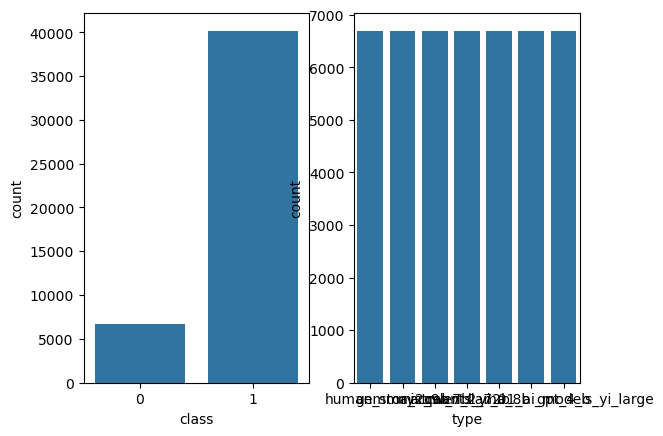

In [139]:
fig, axes=plt.subplots(1,2)

sns.countplot(x='class', data=new_df_reshaped, ax=axes[0])
sns.countplot(x='type', data=new_df_reshaped, ax=axes[1])

## Preprocessing

Remember to lower the text



Encoding strategies

- <b>TFIDF</b>>: Certain words might appear more often in AI text
- <b>Word Embedding</b>: Assigning semantic meaning between texts. (Word2Vector & )
- <b>Bag of Words (BOW)</b>: 

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [141]:
# loading stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [142]:
list(stop_words)

['again',
 'when',
 "i'm",
 'both',
 'her',
 "that'll",
 'mustn',
 'why',
 'these',
 'in',
 'we',
 'this',
 'against',
 'being',
 'not',
 'above',
 'which',
 'with',
 'don',
 'its',
 'so',
 "mustn't",
 'about',
 've',
 'ourselves',
 "weren't",
 "i'll",
 'hers',
 'for',
 'i',
 "she's",
 'out',
 "he's",
 'at',
 'over',
 'during',
 "hasn't",
 't',
 'yours',
 'am',
 're',
 'it',
 'did',
 'been',
 'into',
 "i've",
 'hasn',
 'aren',
 'he',
 'm',
 'most',
 'themselves',
 "doesn't",
 "you'd",
 'does',
 "hadn't",
 'won',
 'are',
 'me',
 'from',
 'while',
 'each',
 "she'd",
 "it'll",
 'once',
 "don't",
 'nor',
 'herself',
 "mightn't",
 'more',
 'weren',
 "wouldn't",
 'of',
 "he'll",
 'any',
 'here',
 'as',
 'shouldn',
 "wasn't",
 'they',
 'should',
 "haven't",
 'is',
 'very',
 'that',
 "they're",
 'wasn',
 'if',
 "shouldn't",
 'y',
 "isn't",
 "we're",
 'further',
 'doesn',
 'didn',
 "he'd",
 'his',
 'off',
 'or',
 'wouldn',
 'those',
 "couldn't",
 'under',
 'ain',
 'have',
 'our',
 'having',
 't

In [143]:
X_tfidf = vectoriser.fit_transform(X.text)
cross_val_score(model, X_tfidf, y, scoring='f1',cv=5)


/opt/miniconda3/envs/news_project/lib/python3.13/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/miniconda3/envs/news_project/lib/python3.13/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/miniconda3/envs/news_project/lib/python3.13/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/miniconda3/envs/news_project/lib/python3.13/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed

array([0.99226257, 0.99300087, 0.9818733 , 0.98950656, 0.99465772])

In [144]:
# lowering text
new_df_reshaped.text = new_df_reshaped.text.str.lower() 

# splitting
X = new_df_reshaped.drop(['type', 'class'], axis=1)
y = new_df_reshaped['class'].values.reshape(-1,1)


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)


# vectorising
vectoriser = TfidfVectorizer(stop_words=list(stop_words)) 

X_train_tfidf = vectoriser.fit_transform(X_train.text)
X_test_tfidf = vectoriser.transform(X_test.text)

# make sure to account for class imbalance


model = RandomForestClassifier(max_depth=15,class_weight='balanced') 

model.fit(X_train_tfidf, Y_train)

/opt/miniconda3/envs/news_project/lib/python3.13/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', max_depth=15)

In [145]:
pred = model.predict(X_test_tfidf)

# model evaluation

In [146]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score


In [147]:
def calculate_metrics(Y_test, pred):
    print (f"f1 score: {f1_score(pred, Y_test)}")
    print (f"accuracy: {accuracy_score(Y_test, pred)}")
    print (f"recall: {recall_score(Y_test, pred)}")
    print (f"precision : {precision_score(Y_test, pred)}")
    

In [148]:
calculate_metrics(Y_test=Y_test, pred=pred)

f1 score: 0.992432297204328
accuracy: 0.9871002132196162
recall: 0.990635535023099
precision : 0.994235588972431


In [149]:
# is it overfitting

train_pred = model.predict(X_train_tfidf)

In [150]:
calculate_metrics(Y_test=Y_train, pred=train_pred)

f1 score: 0.9955253433948144
accuracy: 0.9923507462686567
recall: 0.9917678854338169
precision : 0.9993113809941154


# explaining the model

In [151]:
importance = model.feature_importances_
features = vectoriser.get_feature_names_out()
print (f"shape importance: {np.shape(importance)}")
print (f"shape features: {np.shape(features)}")
# make a dataframe 

feature_importance = pd.DataFrame({
    "feature": features,
    "importance": importance
})

shape importance: (113326,)
shape features: (113326,)


In [152]:
feature_importance.sort_values('importance', ascending=False)

feature  importance
65988          mobile    0.018066
82209            read    0.015719
92125            site    0.013303
25594        controls    0.012729
24635      conclusion    0.012358
...               ...         ...
39489       fisheries    0.000000
39488        fisherat    0.000000
39487     fisherasthe    0.000000
39486   fisherandjosh    0.000000
113325             zz    0.000000

[113326 rows x 2 columns]

In [153]:
feature_importance.sort_values('importance', ascending=False).head(20)

feature  importance
65988       mobile    0.018066
82209         read    0.015719
92125         site    0.013303
25594     controls    0.012729
24635   conclusion    0.012358
101950       title    0.011231
50566       impact    0.009639
23772          com    0.009514
28688         date    0.009204
21040   challenges    0.008950
78552    potential    0.008910
60118       loaded    0.008013
68458   navigation    0.007287
89250       search    0.007109
25467     continue    0.006920
107134     various    0.006738
4283       ability    0.006584
99642    testament    0.006552
83878     reminder    0.006446
49264      however    0.006355

# SHAP

In [154]:
example = X_test.iloc[0:100]

In [155]:
example_tfidf = vectoriser.transform(example.text)

In [186]:
model.predict(example_tfidf)

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [4]:
import joblib
model = joblib.load("ai_detector.pkl")
vectoriser = joblib.load("ai_vectoriser.pkl")

In [8]:
import shap 
example = """Home Secretary Shabana Mahmood has defended sweeping changes to the UK's asylum system, telling MPs the current situation is "out of control and unfair".
Speaking in the House of Commons, Mahmood said: "If we fail to deal with this crisis, we will draw more people down a path that starts with anger and ends in hatred."
Under the plans, refugee status will become temporary, guaranteed housing support for asylum seekers will end and new capped "safe and legal routes" into the UK will be created.
Some Labour MPs expressed concerns, with Nadia Whittome calling the plans "dystopian" and "shameful", but the Conservatives gave the measures a cautious welcome.
Tory leader Kemi Badenoch said the proposals were "positive baby steps". However, she warned that unless the UK left the European Convention on Human Rights, Mahmood's efforts would be "doomed to fail".
Badenoch urged the home secretary to work with the Conservatives, saying she may find their votes would "come in handy" if Labour backbenchers did not support the changes.
Over the past year, the government has been forced to backtrack on some of its policies - including cuts to welfare and the winter fuel payment - after objections from its own MPs.
* 				Key takeaways: What are the proposed asylum system reforms?  Published 3 hours ago   
* 				UK seeks Danish inspiration to shake up immigration system  Published 8 November   
* 				Why do Channel migrants want to come to the UK?  Published 9 July   
* 				Would leaving the ECHR really 'stop the boats'?  Published 9 October   
So far, around 20 Labour MPs have criticised the plans. Whittome, the MP for Nottingham East, accused the government of "ripping up the rights and protections of people who've endured imaginable trauma".
Folkestone and Hythe MP, and immigration lawyer, Tony Vaughan said making refugee status temporary would create a "situation of perpetual limbo and alienation".
Richard Burgon said the measures were "morally wrong" and would "push away Labour voters".
"Why not recognise that now rather than in another few months and have to make a U-turn," the MP for Leeds East said.
Other Labour MPs expressed support for Mahmood. Chris Murray told BBC Radio 5 Live the system had to be fair "otherwise it'll collapse, and there's nothing progressive about letting that happen".
MP for Blackley and Middleton South, Graham Stringer, said the home secretary was "going down the right track".
He said she would reach a "compromise" with Labour MPs but added: "It might all be for naught if we don't get out of the European Convention on Human Rights."
So far this year 111,800 people have claimed asylum in the UK - 39% arrived in a small boat, while 37% arrived by legal means before claiming asylum.
The government says its plans are aimed at reducing the number of people coming to the UK and increasing removals of people who do not have a legal right to be in the country.
The Home Office published
, external
 the changes in a 30-page document and a few hours later Mahmood presented them to the House of Commons.
Under the proposals, people granted refugee status will only be allowed to stay in the country temporarily, with their status reviewed every 30 months - half the current time period.
People could be returned to their home country, when it is deemed safe to do so.
The amount of time refugees will have to be in the UK before being allowed to apply for permanent residence will be quadrupled from five years to 20.
Families with children who have been refused asylum will be offered incentives to leave but could be forcibly removed if they refuse to go voluntarily.
Asylum seekers with income or assets would have to contribute to the cost of their stay in the UK.
Mahmood told MPs this would "end the absurdity where an asylum seeker receiving £800 a month from his family and an Audi was receiving free housing at the taxpayer's expense and the courts judged we could do nothing about it".
Home Office sources have pushed back against suggestions asylum seekers could have items of sentimental value, such as wedding rings, confiscated to pay for their accommodation.
In order to make it easier to remove failed asylum seekers, the government intends to change the way the European Convention of Human Rights and Modern Slavery Act is applied.
Mahmood also threatened to stop granting visas to people from three African countries - Angola, the Democratic Republic of Congo and Namibia - unless those governments improved co-operation on deportations.
Setting out her plans for capped safe and legal routes, Mahmood said voluntary and community organisations would be given "greater involvement" in receiving and supporting new arrivals.
Liberal Democrat home affairs spokesman Max Wilkinson welcomed the introduction of new safe and legal routes but accused the home secretary of "stoking division by using immoderate language".
Reform UK leader Nigel Farage praised Mahmood's "strong language" and suggested she was auditioning to join his party.
However, he said he had "serious doubts" her plans would survive objections from Labour backbenchers or the European Court of Human Rights.
Enver Solomon of the Refugee Council charity said tightening the system would not deter people "fleeing for their lives".
He said people were not coming to the UK because of the asylum rules but because they spoke English or had familial ties or community connections in the country.
"We have those communities because of our historical links and our past history as a big colonial nation," he added.
"""
example_tfidf = vectoriser.transform([example])
explainer = shap.Explainer(model, feature_names=vectoriser.get_feature_names_out())

shap_values = explainer.shap_values(example_tfidf.toarray())

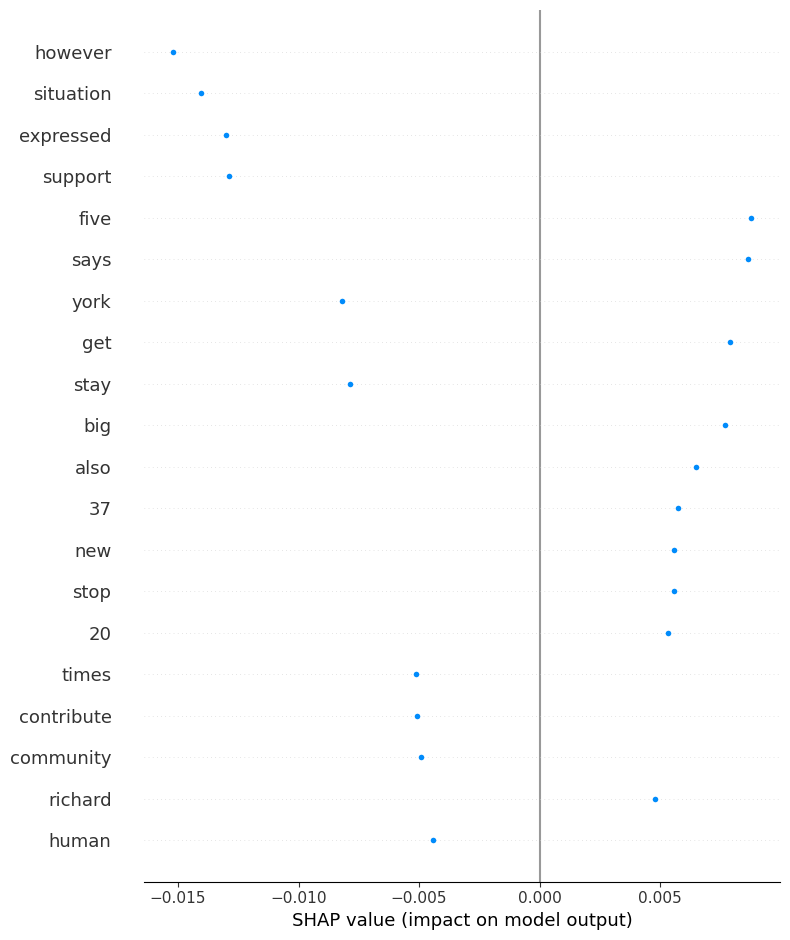

In [13]:
shap.summary_plot(shap_values[:,:,0], feature_names=vectoriser.get_feature_names_out())

In [28]:
explainer.expected_value

array([0.50030823, 0.49969177])

In [32]:
shap.initjs() 

shap.force_plot(explainer.expected_value[0], shap_values[:,:,0])

In [162]:
example.text.iloc[0]

'title embracing the future a guest blogger s perspective on modern education in the ever evolving landscape of the 21st century education has become a dynamic and transformative force today we re delighted to welcome a guest blogger who shares their insights on modern education and the innovative approaches shaping our children s futures our guest blogger an educator with over two decades of experience believes that the education system is undergoing a significant shift driven by technological advancements global connectivity and a growing emphasis on critical thinking and creativity one of the most notable changes in modern education is the integration of technology gone are the days of chalkboards and textbooks today s classrooms are equipped with interactive whiteboards laptops and tablets providing students with a wealth of resources at their fingertips this digital revolution not only enhances the learning experience but also prepares students for the tech driven world they will 

In [164]:
example_1 = pd.DataFrame({
    'text': [example.text.iloc[0]]
})

example_1_tfidf = vectoriser.transform(example_1.text)
shap_values=explainer(example_1_tfidf.toarray())

In [192]:
model.predict(example_1_tfidf)

array([1])

In [165]:
shap_values

.values =
array([[[-6.15276290e-06,  6.15276290e-06],
        [-3.13017693e-05,  3.13017693e-05],
        [ 0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00]]], shape=(1, 113326, 2))

.base_values =
array([[0.49952285, 0.50047715]])

.data =
array([[0., 0., 0., ..., 0., 0., 0.]], shape=(1, 113326))

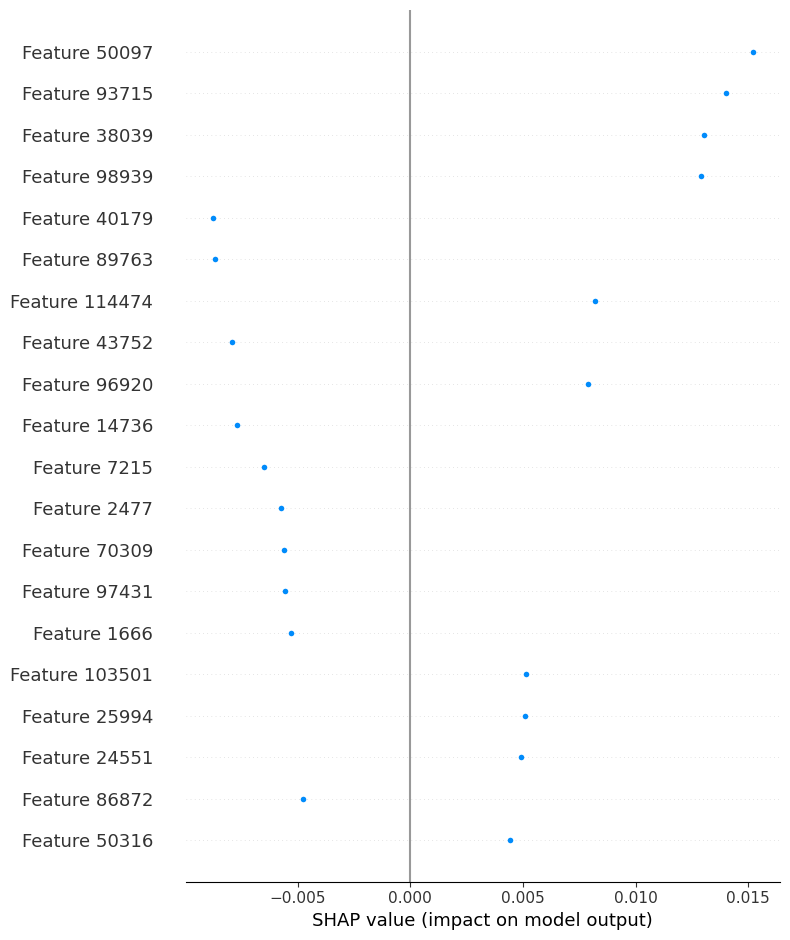

In [61]:
feature_names = vectoriser.get_feature_names_out()

# Summary plot (best for high-dimensional TF-IDF)
shap.summary_plot(shap_values[:,:,-1])


In [185]:
shap.initjs()
shap.force_plot(shap_values[:,:,-1])

ValueError: Could not find feature named: conclusion

In [190]:
shap.plots.bar(shap_values[:,:,-1], feature_names)

TypeError: '>' not supported between instances of 'str' and 'int'

# Scikit-Learn Pipeline

In [68]:
news = """Every company would be affected if the AI bubble were to burst, the head of Google's parent firm Alphabet has told the BBC.

Speaking exclusively to BBC News, Sundar Pichai said while the growth of artificial intelligence (AI) investment had been an "extraordinary moment", there was some "irrationality" in the current AI boom.

It comes amid fears in Silicon Valley and beyond of a bubble as the value of AI tech companies has soared in recent months and companies spend big on the burgeoning industry.

Asked whether Google would be immune to the impact of the AI bubble bursting, Mr Pichai said the tech giant could weather that potential storm, but also issued a warning.

"I think no company is going to be immune, including us," he said.

In a wide-ranging exclusive interview at Google's California headquarters, he also addressed energy needs, slowing down climate targets, UK investment, the accuracy of his AI models, and the effect of the AI revolution on jobs.

The interview comes as scrutiny on the state of the AI market has never been more intense.

Alphabet shares have doubled in value in seven months to $3.5tn (£2.7tn) as markets have grown more confident in the search giant's ability to fend off the threat from ChatGPT owner OpenAI.

A particular focus is Alphabet's development of specialised superchips for AI that compete with Nvidia, run by Jensen Huang, which recently reached a world first $5tn valuation.

As valuations rise, some analysts have expressed scepticism about a complicated web of $1.4tn of deals being done around OpenAI, which is expected to have revenues this year of less than one thousandth of the planned investment."""

In [70]:
news_tfidf = vectoriser.transform([news])

explainer = shap.Explainer(model, feature_names=vectoriser.get_feature_names_out()) 
shap_values = explainer(news_tfidf.toarray())

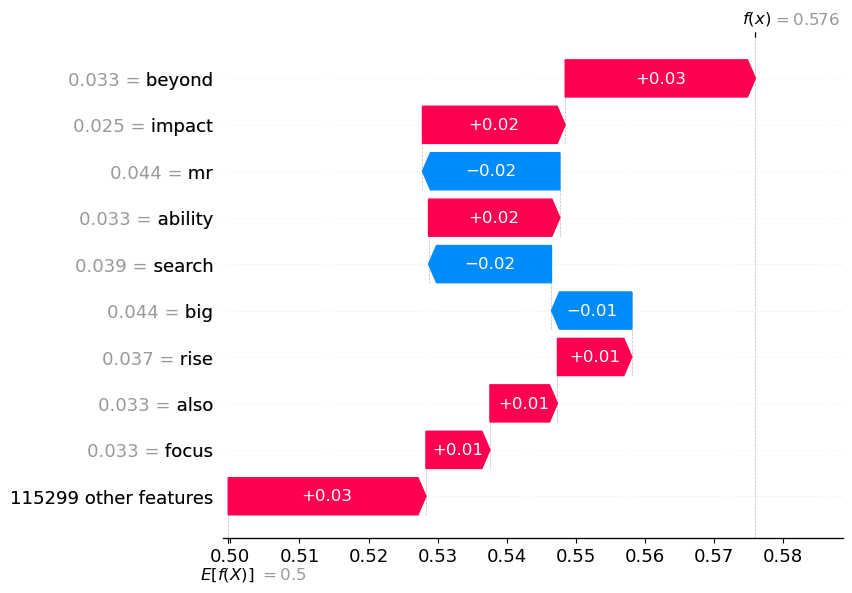

In [80]:
shap.plots.waterfall(shap_values[:,:,-1][0])

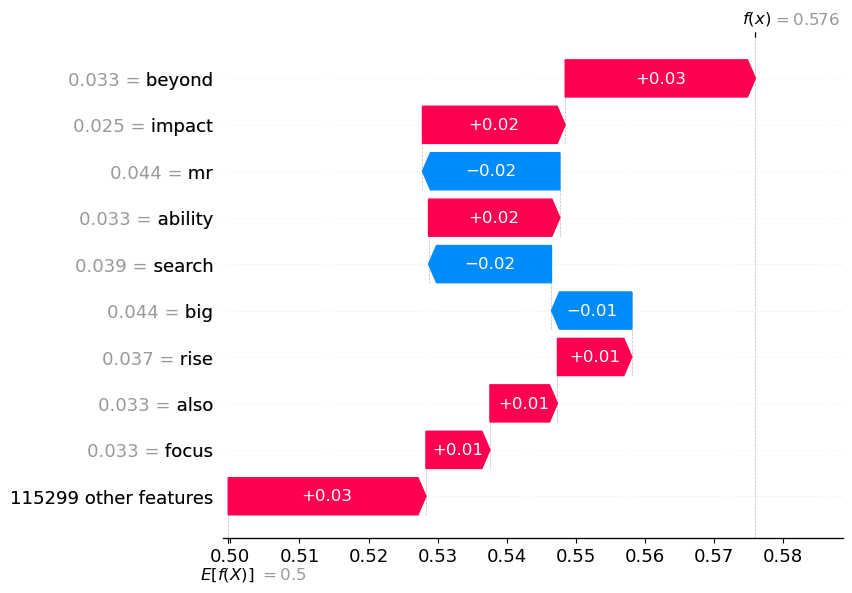

In [82]:
shap.plots.waterfall(shap_values[:,:,1][0])

In [53]:
from classify_news import classifier

In [54]:
a = classifier(text=news)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, feature_weights=None, gamma=1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)
TfidfVectorizer(stop_words=['hers', 'if', 'from', 'ourselves', 'both', 'only',
                            'by', 'which', 'or', 'other', 'isn', 'into', 'been',
                            "hadn't", "couldn't", "she'd", 'further', "he'll",
                    

In [55]:
a.predict()

armed conflicts and attacks  arts and culture  disasters and accidents  \
0                          1.0               1.0                      0.0   

   international relations  law and crime and politics  \
0                      0.0                         1.0   

   politics and elections and economics  science and technology  sports  \
0                                   0.0                     1.0     0.0   

   other current events  business and economics  religion and politics  \
0                   1.0                     0.0                    0.0   

   entertainment  health and environment  culture and entertainment  
0            0.0                     0.0                        1.0

In [56]:
a.predict_proba()

armed conflicts and attacks  arts and culture  disasters and accidents  \
0                     0.975964          0.599675                  0.00072   

   international relations  law and crime and politics  \
0                 0.000699                    0.651952   

   politics and elections and economics  science and technology    sports  \
0                              0.000772                0.877657  0.015365   

   other current events  business and economics  religion and politics  \
0              0.908402                0.041251               0.150907   

   entertainment  health and environment  culture and entertainment  
0       0.263373                0.007242                   0.994253

In [57]:
a.explain()

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. Consider retrying with the feature_perturbation='interventional' option. This check failed because for one of the samples the sum of the SHAP values was 0.374772, while the model output was 0.404111. If this difference is acceptable you can set check_additivity=False to disable this check.

In [38]:
a.predict()

armed conflicts and attacks  arts and culture  disasters and accidents  \
0                          1.0               0.0                      0.0   

   international relations  law and crime and politics  \
0                      0.0                         0.0   

   politics and elections and economics  science and technology  sports  \
0                                   0.0                     1.0     1.0   

   other current events  business and economics  religion and politics  \
0                   1.0                     1.0                    1.0   

   entertainment  health and environment  culture and entertainment  
0            0.0                     0.0                        0.0

In [41]:
a.predict_proba()

armed conflicts and attacks  arts and culture  disasters and accidents  \
0                      0.80321          0.491996                 0.000912   

   international relations  law and crime and politics  \
0                 0.000854                    0.060056   

   politics and elections and economics  science and technology    sports  \
0                              0.000948                0.992137  0.782135   

   other current events  business and economics  religion and politics  \
0              0.999036                0.830619               0.510311   

   entertainment  health and environment  culture and entertainment  
0       0.041207                0.000993                   0.028628

In [42]:
from ai_detection import ai_detector 

b = ai_detector(news) 
b.predict()

'This is likely a human generated text'

In [43]:
b.explain()

Found a NULL input array in _cext_dense_tree_update_weights!


ValueError: setting an array element with a sequence.

In [58]:
model

RandomForestClassifier(class_weight='balanced', max_depth=15)

In [62]:
from ai_detection import ai_detector

In [63]:
b = ai_detector(news)

In [64]:
b.predict()

'This is likely an AI generated text'

In [65]:
b.predict_proba()

human_generated  AI_generated
0         0.423974      0.576026

In [66]:
b.explain()

Found a NULL input array in _cext_dense_tree_update_weights!


ValueError: setting an array element with a sequence.

In [84]:
a = joblib.load("data/preprocessed_data.pkl")

In [87]:
import pandas as pd
b = pd.read_csv("data/cleaned_df.csv")
b

Unnamed: 0                                              topic  \
0            1123                        Armed conflicts and attacks   
1            2097  Armed conflicts and attacks,Arts and culture, ...   
2            2097  Armed conflicts and attacks,Arts and culture, ...   
3            2097  Armed conflicts and attacks,Arts and culture, ...   
4            2097  Armed conflicts and attacks,Arts and culture, ...   
...           ...                                                ...   
58583        7309  Attacks and armed conflicts,Business and econo...   
58584        7309  Attacks and armed conflicts,Business and econo...   
58585        7309  Attacks and armed conflicts,Business and econo...   
58586        7309  Attacks and armed conflicts,Business and econo...   
58587        7309  Attacks and armed conflicts,Business and econo...   

                    date                                               text  \
0       November 3, 2007  2007 Pakistani state of emergency,\n,President...   
1           June 2, 2010  The crew of the ,Libyan, M/V ,Rim, takes back ...   
2           June 2, 2010  The crew of the ,Libyan, M/V ,Rim, takes back ...   
3           June 2, 2010  The crew of the ,Libyan, M/V ,Rim, takes back ...   
4           June 2, 2010  The crew of the ,Libyan, M/V ,Rim, takes back ...   
...                  ...                                                ...   
58583  February 28, 2025  2025 Darul Uloom Haqqania bombing,\n,Five peop...   
58584  February 28, 2025  2025 Darul Uloom Haqqania bombing,\n,Five peop...   
58585  February 28, 2025  2025 Darul Uloom Haqqania bombing,\n,Five peop...   
58586  February 28, 2025  2025 Darul Uloom Haqqania bombing,\n,Five peop...   
58587  February 28, 2025  2025 Darul Uloom Haqqania bombing,\n,Five peop...   

                                            text_cleaned date_cleaned  \
0      2007 Pakistani state of emergency   President ...   2007-11-03   
1      The crew of the  Libyan  M V  Rim  takes back ...   2010-06-02   
2      The crew of the  Libyan  M V  Rim  takes back ...   2010-06-02   
3      The crew of the  Libyan  M V  Rim  takes back ...   2010-06-02   
4      The crew of the  Libyan  M V  Rim  takes back ...   2010-06-02   
...                                                  ...          ...   
58583  2025 Darul Uloom Haqqania bombing   Five peopl...   2025-02-28   
58584  2025 Darul Uloom Haqqania bombing   Five peopl...   2025-02-28   
58585  2025 Darul Uloom Haqqania bombing   Five peopl...   2025-02-28   
58586  2025 Darul Uloom Haqqania bombing   Five peopl...   2025-02-28   
58587  2025 Darul Uloom Haqqania bombing   Five peopl...   2025-02-28   

                     topic_cleaned                           topic_split  
0      Armed conflicts and attacks           armed conflicts and attacks  
1      Armed conflicts and attacks           armed conflicts and attacks  
2      Armed conflicts and attacks                      arts and culture  
3      Armed conflicts and attacks                      arts and culture  
4      Armed conflicts and attacks               disasters and accidents  
...                            ...                                   ...  
58583       Science and technology                health and environment  
58584       Science and technology               international relations  
58585       Science and technology            law and crime and politics  
58586       Science and technology  politics and elections and economics  
58587       Science and technology                science and technology  

[58588 rows x 8 columns]

In [89]:
c = pd.read_csv("data/news_data_ready_to_plot.csv")
c

date_cleaned                           topic_split  count
0      2007-11-03           armed conflicts and attacks      1
1      2010-06-02           armed conflicts and attacks      9
2      2010-06-02                      arts and culture     18
3      2010-06-02               disasters and accidents      9
4      2010-06-02               international relations      9
...           ...                                   ...    ...
9607   2025-10-06               disasters and accidents      6
9608   2025-10-06               international relations      6
9609   2025-10-06            law and crime and politics      6
9610   2025-10-06  politics and elections and economics      6
9611   2025-10-06                science and technology      6

[9612 rows x 3 columns]

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='date_cleaned', ylabel='count'>

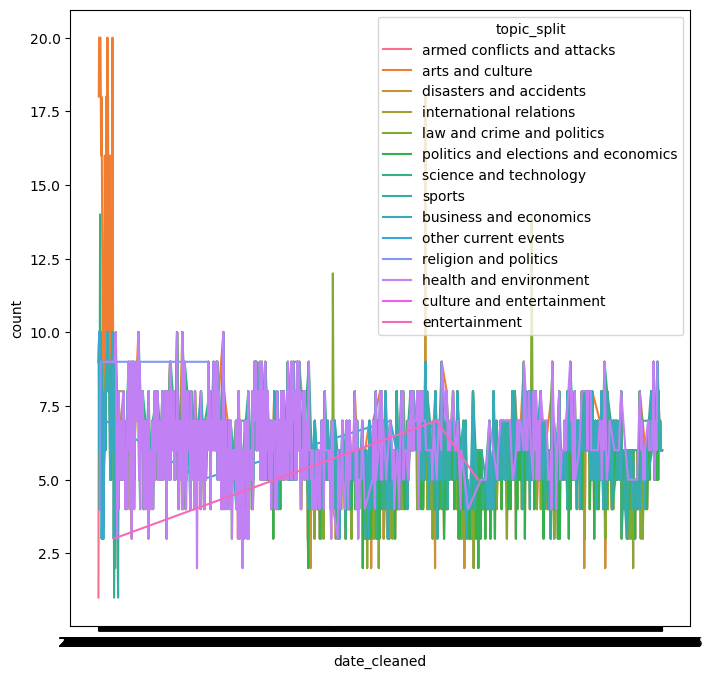

In [95]:
plt.figure(figsize=(8,8))
sns.lineplot(x='date_cleaned', y='count', hue='topic_split', data=c)

<Axes: xlabel='count', ylabel='topic_split'>

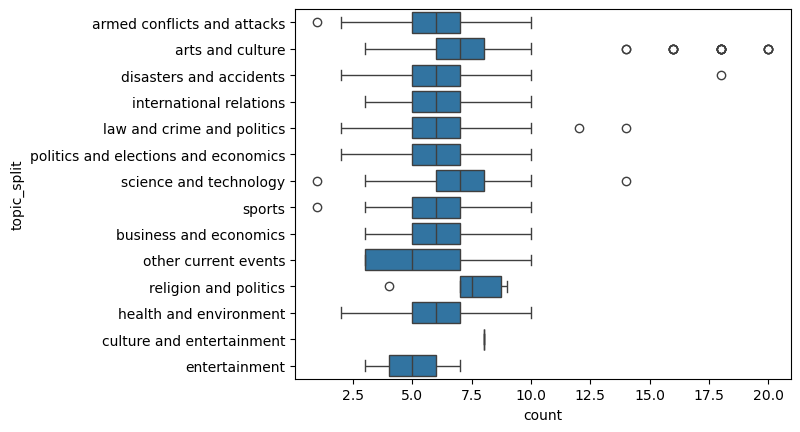

In [94]:
sns.boxplot(y='topic_split', x='count', data=c)